In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, AffinityPropagation
import matplotlib.pyplot as plt
import matplotlib.cbook
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
import plotly as py
import plotly.graph_objs as go

import datetime as dt
import missingno as msno
plt.rcParams['figure.dpi'] = 140
import nltk
from gensim.models import Word2Vec
from nltk.corpus import stopwords

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel
from sklearn.cluster import MiniBatchKMeans
import networkx as nx
import time
import math as math

import re

In [2]:
df=pd.read_csv('C:/Users/kartik/Desktop/Data Analyst working/python/netflix/netflix_titles.csv')

In [6]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [7]:
df.shape

(8807, 12)

In [8]:
df['show_id'].nunique()

8807

In [3]:
df['type'].value_counts()/df.shape[0]*100

Movie      69.615079
TV Show    30.384921
Name: type, dtype: float64

In [4]:
df['release_year'].min(),df['release_year'].max()

(1925, 2021)

In [5]:
df['rating'].nunique()

17

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [7]:
df['country'].fillna('Unknown', inplace = True)
df['director'].fillna('Unknown', inplace = True)
df['cast'].fillna('Unknown', inplace = True)
df['rating'].mode()

0    TV-MA
dtype: object

In [8]:
df['rating'].value_counts()

TV-MA       3207
TV-14       2160
TV-PG        863
R            799
PG-13        490
TV-Y7        334
TV-Y         307
PG           287
TV-G         220
NR            80
G             41
TV-Y7-FV       6
NC-17          3
UR             3
84 min         1
74 min         1
66 min         1
Name: rating, dtype: int64

In [9]:
df['listed_in'].value_counts()

Dramas, International Movies                            362
Documentaries                                           359
Stand-Up Comedy                                         334
Comedies, Dramas, International Movies                  274
Dramas, Independent Movies, International Movies        252
                                                       ... 
British TV Shows, Kids' TV, TV Thrillers                  1
TV Comedies, TV Dramas, TV Mysteries                      1
Kids' TV, Reality TV, TV Dramas                           1
Crime TV Shows, International TV Shows, TV Thrillers      1
Anime Series, Kids' TV, TV Action & Adventure             1
Name: listed_in, Length: 514, dtype: int64

In [10]:
df['rating'].fillna(df['rating'].mode(),inplace = True)

In [11]:
df['rating'].isna().sum()

4

In [12]:
df['duration'].value_counts()

1 Season     1793
2 Seasons     425
3 Seasons     199
90 min        152
97 min        146
             ... 
203 min         1
237 min         1
230 min         1
205 min         1
224 min         1
Name: duration, Length: 220, dtype: int64

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      8807 non-null   object
 4   cast          8807 non-null   object
 5   country       8807 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


<AxesSubplot:xlabel='type', ylabel='count'>

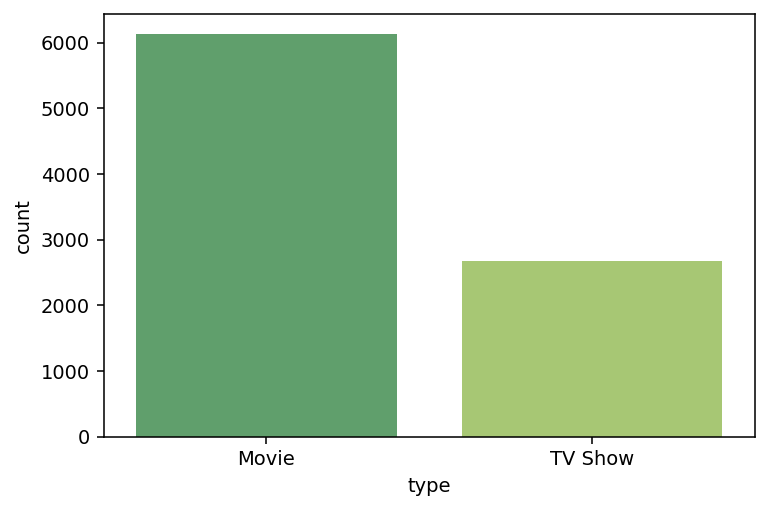

In [14]:
sns.countplot(data = df ,x = df['type'],palette = 'summer')

In [15]:
df['release_year'] = pd.to_numeric(df['release_year'])

In [16]:
df['release_year']

0       2020
1       2021
2       2021
3       2021
4       2021
        ... 
8802    2007
8803    2018
8804    2009
8805    2006
8806    2015
Name: release_year, Length: 8807, dtype: int64

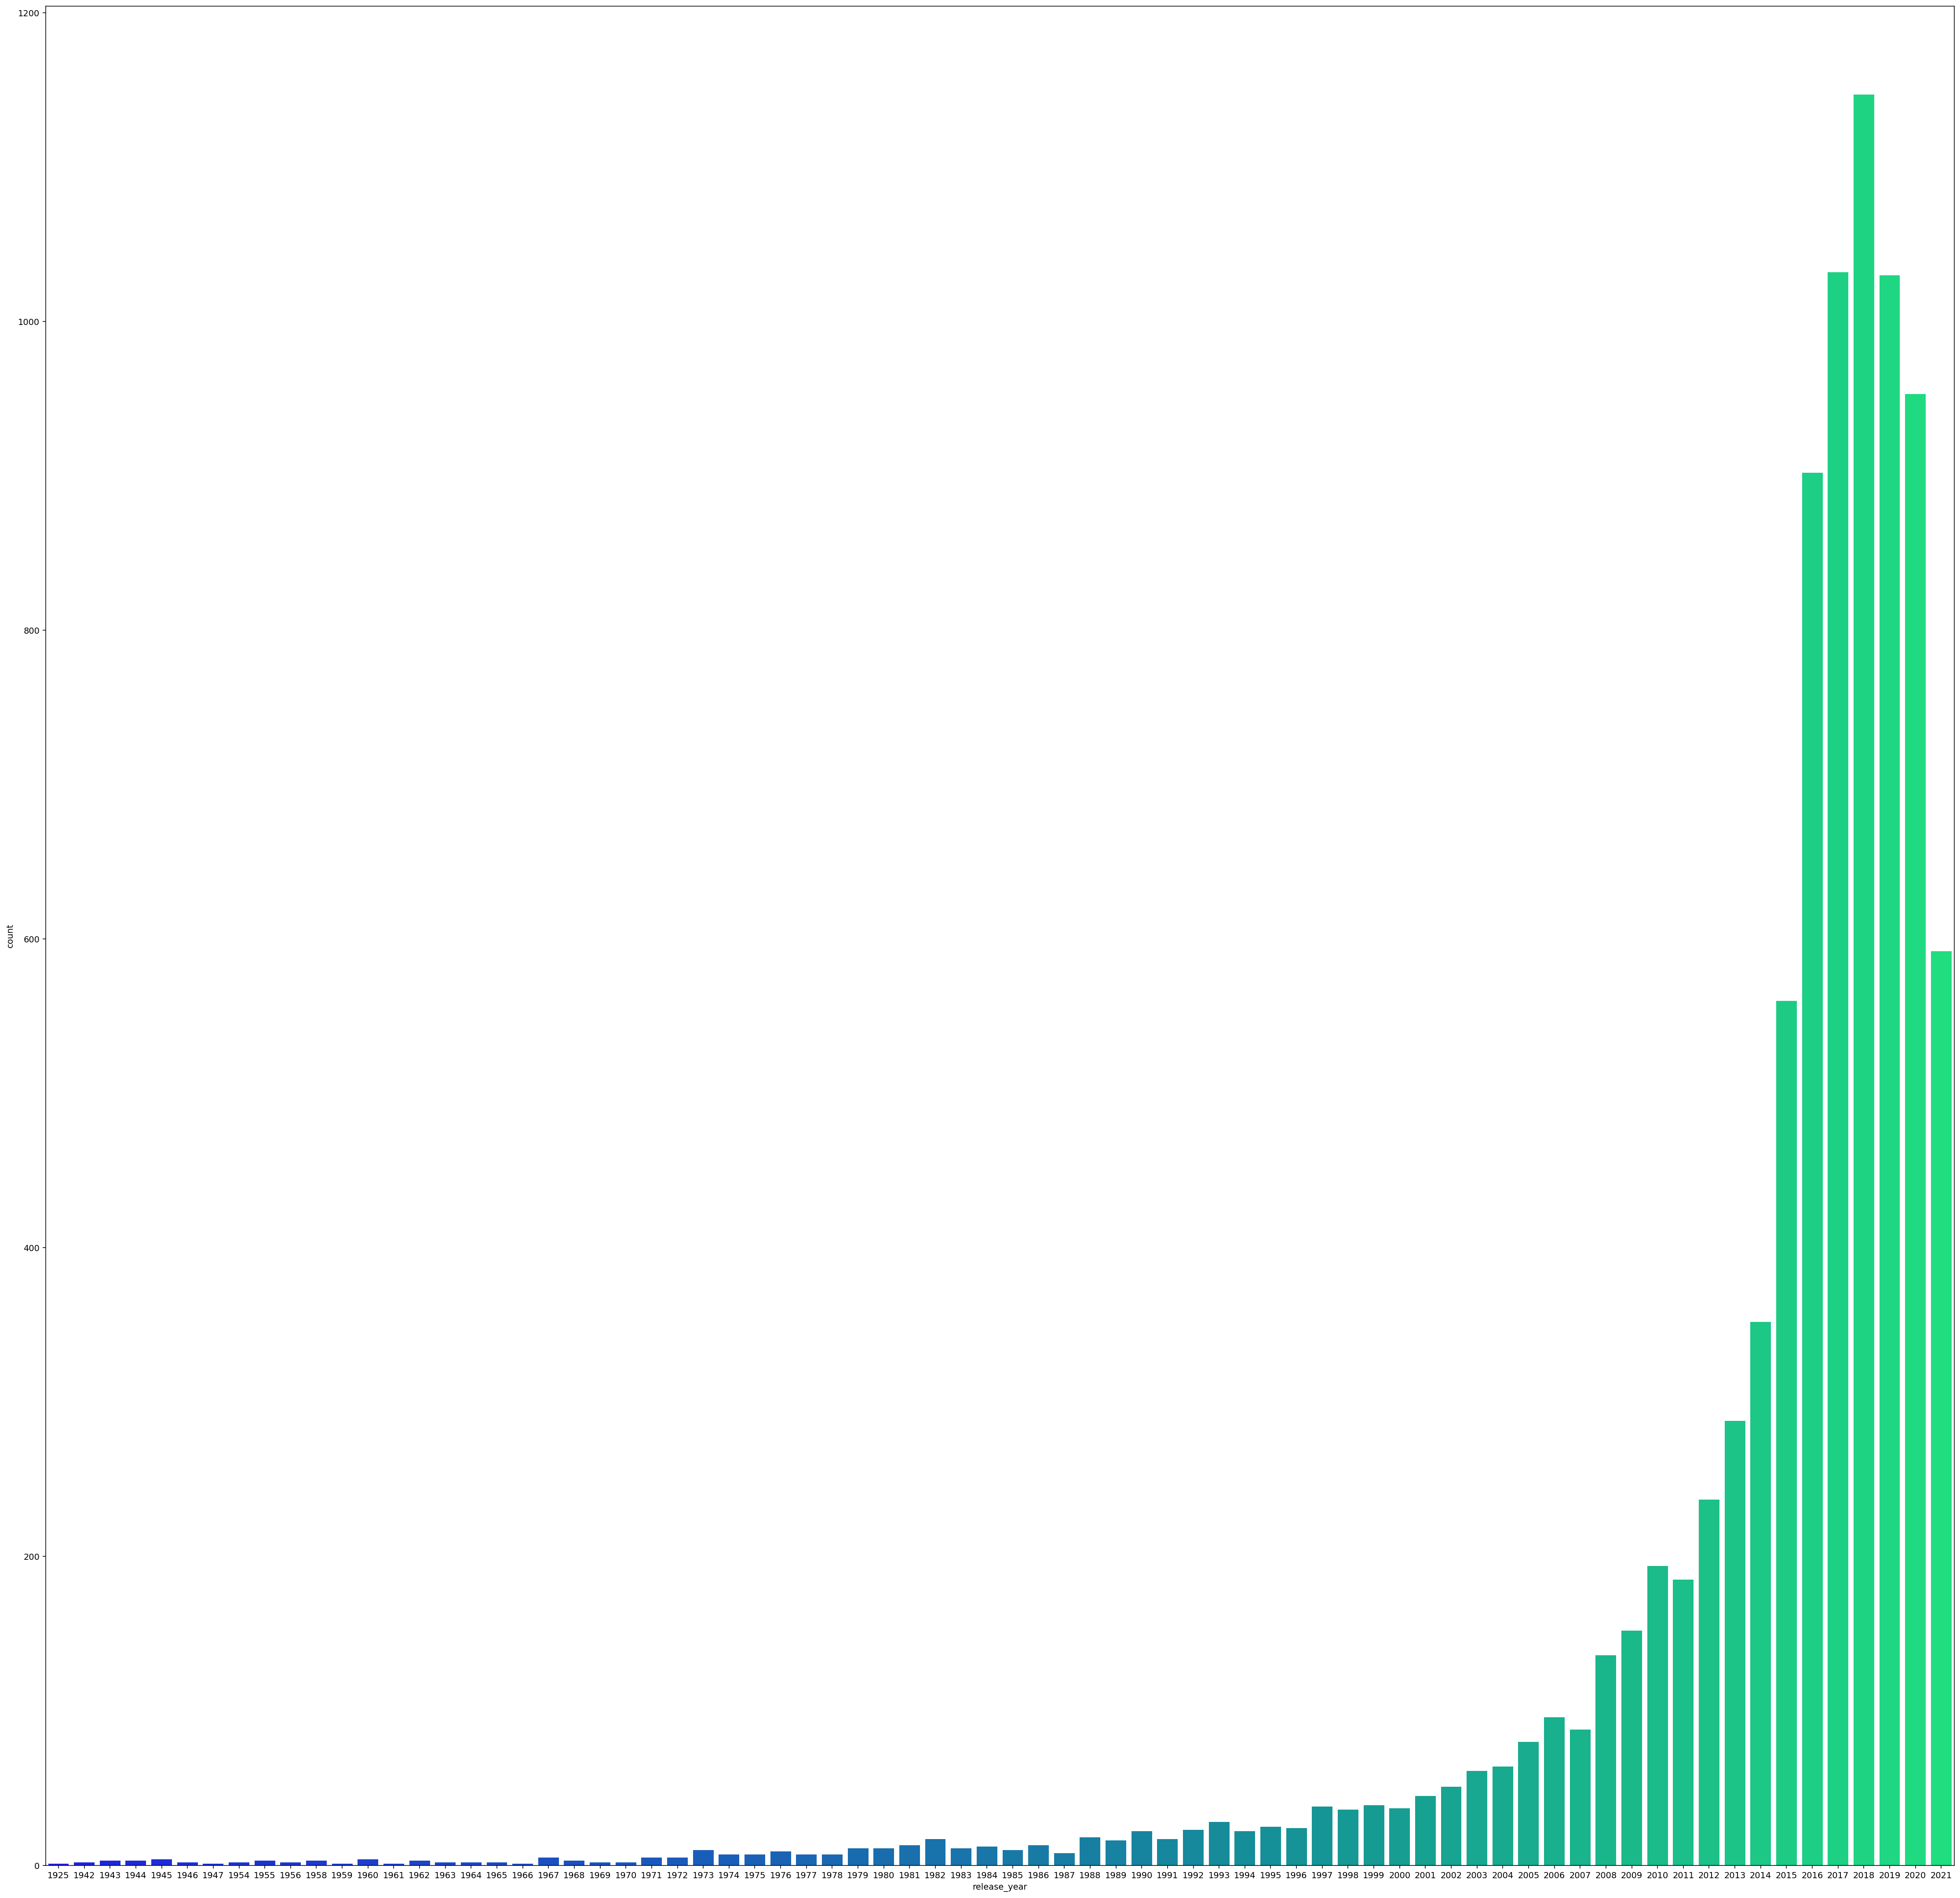

In [17]:
plt.figure(figsize = (40,40))
sns.countplot(data = df ,x = df['release_year'],palette = 'winter')
plt.show()

In [18]:
from sklearn.preprocessing import MultiLabelBinarizer 

import matplotlib.colors

def genre_heatmap(df, title):
    df['genre'] = df['listed_in'].apply(lambda x :  x.replace(' ,',',').replace(', ',',').split(',')) 
    Types = []
    for i in df['genre']: Types += i
    Types = set(Types)
    print("There are {} types in the Disney Plus {} Dataset".format(len(Types),title))    
    test = df['genre']
    mlb = MultiLabelBinarizer()
    res = pd.DataFrame(mlb.fit_transform(test), columns=mlb.classes_, index=test.index)
    corr = res.corr()
    mask = np.zeros_like(corr, dtype=np.bool)
    mask[np.triu_indices_from(mask)] = True
    fig, ax = plt.subplots(figsize=(10, 7))
    fig.text(.54,.88,'Genre correlation', fontfamily='serif',fontweight='bold',fontsize=15)
    fig.text(.75,.665,
            '''
             It is interesting that Independant Movies
             tend to be Dramas. 
             
             Another observation is that 
             International Movies are rarely
             in the Children and family genre.
             ''', fontfamily='serif',fontsize=12,ha='right')
    pl = sns.heatmap(corr, mask=mask, cmap='RdBu', vmax=.3, vmin=-.3, center=0, square=True, linewidths=2.5)
    
    plt.show()

There are 20 types in the Disney Plus Movie Dataset


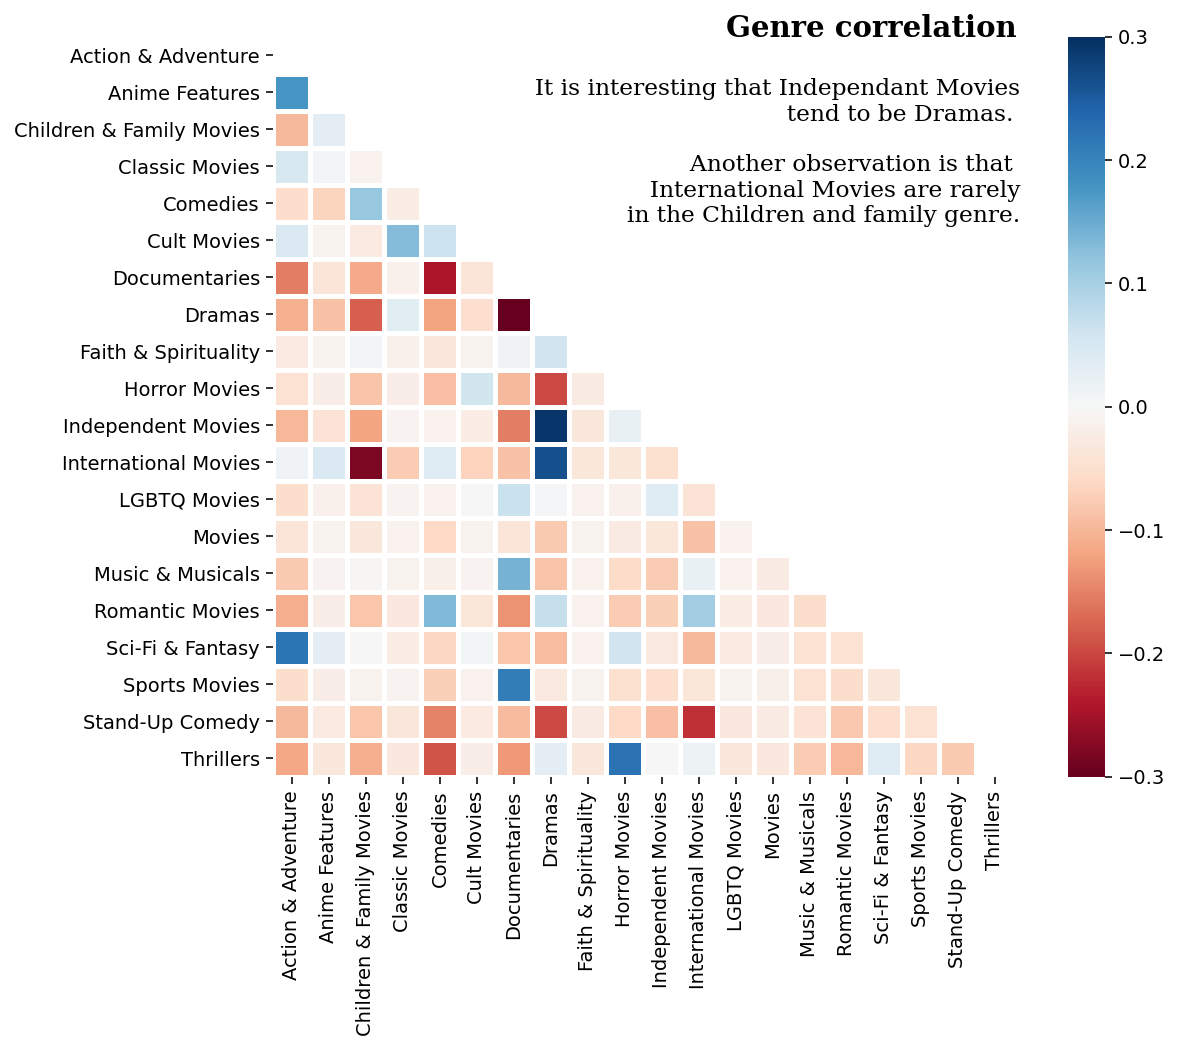

In [19]:
df["date_added"] = pd.to_datetime(df['date_added'])

df['month_added']=df['date_added'].dt.month
df['month_name_added']=df['date_added'].dt.month_name()
df['year_added'] = df['date_added'].dt.year
df['count'] = 1
df['first_country'] = df['country'].apply(lambda x: x.split(",")[0])
df_tv = df[df["type"] == "TV Show"]
df_movies = df[df["type"] == "Movie"]


genre_heatmap(df_movies, 'Movie')
plt.show()

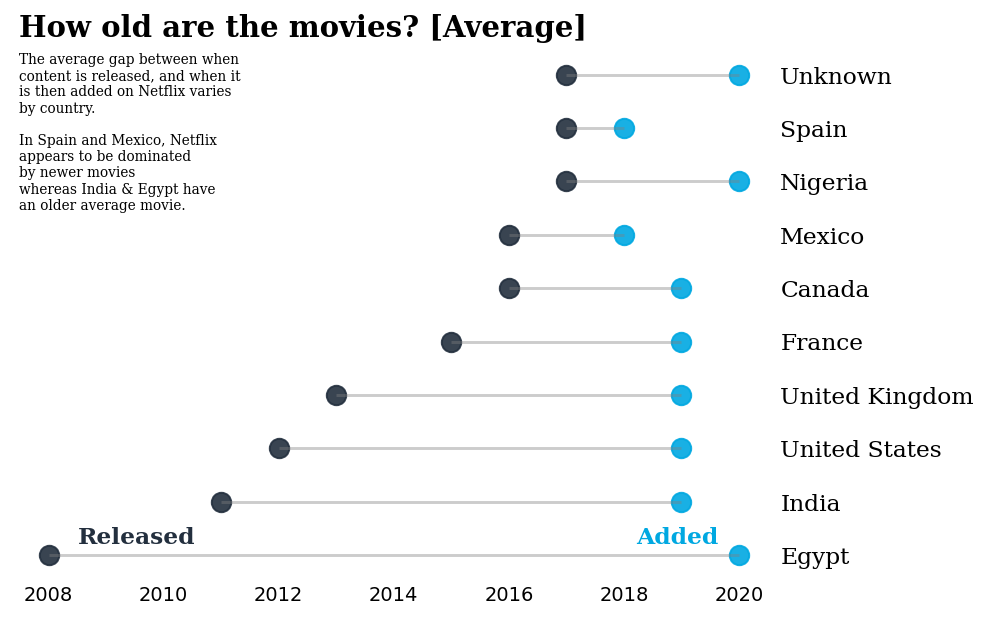

In [20]:
### Relevant groupings

data = df_movies.groupby('first_country')[['first_country','count']].sum().sort_values(by='count',ascending=False).reset_index()[:10]
data = data['first_country']
df_loli = df_movies.loc[df_movies['first_country'].isin(data)]

loli = df_loli.groupby('first_country')['release_year','year_added'].mean().round()


# Reorder it following the values of the first value
ordered_df = loli.sort_values(by='release_year')

ordered_df_rev = loli.sort_values(by='release_year',ascending=False)

my_range=range(1,len(loli.index)+1)


fig, ax = plt.subplots(1, 1, figsize=(7, 5))

fig.text(0.13, 0.9, 'How old are the movies? [Average]', fontsize=15, fontweight='bold', fontfamily='serif')
plt.hlines(y=my_range, xmin=ordered_df['release_year'], xmax=ordered_df['year_added'], color='grey', alpha=0.4)
plt.scatter(ordered_df['release_year'], my_range, color='#232F3E',s=100, alpha=0.9, label='Average release date')
plt.scatter(ordered_df['year_added'], my_range, color='#00A8E1',s=100, alpha=0.9 , label='Average added date')
#plt.legend()

for s in ['top', 'left', 'right', 'bottom']:
    ax.spines[s].set_visible(False)
    

# Removes the tick marks but keeps the labels
ax.tick_params(axis=u'both', which=u'both',length=0)
# Move Y axis to the right side
ax.yaxis.tick_right()

plt.yticks(my_range, ordered_df.index)
plt.yticks(fontname = "serif",fontsize=12)

# Custome legend
fig.text(0.19,0.175,"Released", fontweight="bold", fontfamily='serif', fontsize=12, color='#232F3E')
fig.text(0.76,0.175,"Added", fontweight="bold", fontfamily='serif', fontsize=12, color='#00A8E1')


fig.text(0.13, 0.63, 
'''The average gap between when 
content is released, and when it
is then added on Netflix varies
by country. 

In Spain and Mexico, Netflix 
appears to be dominated 
by newer movies 
whereas India & Egypt have
an older average movie.
'''

, fontsize=7, fontweight='light', fontfamily='serif')


#plt.xlabel('Year')
#plt.ylabel('Country')
plt.show()

In [21]:
df ['full_text'] = df['type']+" "+df["title"]+" "+df["director"]+" "+df['cast']+" "+df["listed_in"]+" "+df["description"]

In [22]:
df.iloc[180]

show_id                                                          s181
type                                                            Movie
title                              The Nutty Professor II: The Klumps
director                                                  Peter Segal
cast                Eddie Murphy, Janet Jackson, Larry Miller, Joh...
country                                                       Unknown
date_added                                        2021-09-01 00:00:00
release_year                                                     2000
rating                                                          PG-13
duration                                                      107 min
listed_in                                   Comedies, Romantic Movies
description         After getting engaged, Sherman Klump prepares ...
month_added                                                       9.0
month_name_added                                            September
year_added          

In [23]:
df["full_text"][199]

'Movie Koi Aap Sa Partho Mitra Aftab Shivdasani, Natassha, Dipannita Sharma, Himanshu Mallik, Vaidya Advai, Pushy Anand, Shama Deshpande, Rajendra Gupta Comedies, Dramas, International Movies Star athlete Rohan has his eye on a beautiful art student. But when his best friend Simran experiences a crisis, he drops everything to help her.'

In [24]:
for i,v in enumerate(df.itertuples()):
    df.at[i,"full_text"] = re.sub(r'\[[0-9]*\]',' ',df.at[i,"full_text"])
    df.at[i,"full_text"] = re.sub(r'\s+',' ',df.at[i,"full_text"])
    df.at[i,"full_text"] = df.at[i,"full_text"].lower()
    df.at[i,"full_text"] = re.sub(r'\d',' ',df.at[i,"full_text"])
    df.at[i,"full_text"] = re.sub(r'\s+',' ',df.at[i,"full_text"])
    df.at[i,"full_text"] = nltk.sent_tokenize(df.at[i,"full_text"])
    df.at[i,"full_text"] = [word for word in df.at[i,"full_text"] if word not in stopwords.words('english')]
    

In [25]:
df["full_text"][223]

['tv show john of god: the crimes of a spiritual healer mauricio dias, tatiana villela unknown crime tv shows, docuseries, international tv shows idolized medium joão teixeira de faria rises to international fame before horrifying abuse is revealed by survivors, prosecutors and the press.']

In [34]:
df["full_text"][223]

['tv show john of god: the crimes of a spiritual healer mauricio dias, tatiana villela unknown crime tv shows, docuseries, international tv shows idolized medium joão teixeira de faria rises to international fame before horrifying abuse is revealed by survivors, prosecutors and the press.']

In [26]:
model = Word2Vec(df["full_text"], min_count=1)

In [27]:
words = model.wv

print(words.most_similar(df["full_text"][223]))

[("tv show borgen unknown sidse babett knudsen, birgitte hjort sørensen, pilou asbæk, emil poulsen, freja riemann, søren malling, thomas levin, benedikte hansen, mikael birkkjær, anders juul, lisbeth wulff, kasper lange, lars knutzon, søren spanning, christoph bastrup, morten kirkskov, bjarne henriksen, peter mygind, ole thestrup, iben dorner, dar salim, jens albinus, christian tafdrup, alastair mackenzie, julie agnete vang, kristian halken, ricard lawrence, marie askehave, rikke lylloff, mille dinesen, anne sofie espersen international tv shows, tv dramas a shocking turn of events puts birgitte nyborg in the danish prime minister's seat as her country's first female leader in this landmark drama.", 0.39429259300231934), ('movie project power henry joost, ariel schulman jamie foxx, joseph gordon-levitt, dominique fishback, rodrigo santoro, courtney b. vance, amy landecker, machine gun kelly, tait fletcher, allen maldonado, andrene ward-hammond action & adventure an ex-soldier, a teen a

In [28]:
df['directors'] = df['director'].apply(lambda l: \
        ([] if pd.isna(l) else [i.strip() for i in l.split(',')]))
df['categories'] = df['listed_in'].apply(lambda l: \
        ([] if pd.isna(l) else [i.strip() for i in l.split(',')]))
df['actors'] = df['cast'].apply(lambda l: \
                                ([] if pd.isna(l) else [i.strip()
                                for i in l.split(',')]))
df['countries'] = df['country'].apply(lambda l: \
        ([] if pd.isna(l) else [i.strip() for i in l.split(',')]))

In [29]:
df['directors'] = df['director'].apply(lambda l: \
        ([] if pd.isna(l) else [i.strip() for i in l.split(',')]))
df['categories'] = df['listed_in'].apply(lambda l: \
        ([] if pd.isna(l) else [i.strip() for i in l.split(',')]))
df['actors'] = df['cast'].apply(lambda l: \
                                ([] if pd.isna(l) else [i.strip()
                                for i in l.split(',')]))
df['countries'] = df['country'].apply(lambda l: \
        ([] if pd.isna(l) else [i.strip() for i in l.split(',')]))

In [ ]:
start_time = time.time()
text_content = df['description']
vector = TfidfVectorizer(
    max_df=0.4,
    min_df=1,
    stop_words='english',
    lowercase=True,
    use_idf=True,
    norm=u'l2',
    smooth_idf=True,
    )
tfidf = vector.fit_transform(text_content)

def find_similar(tfidf_matrix, index, top_n=5):
    cosine_similarities = linear_kernel(tfidf_matrix[index:index + 1],
            tfidf_matrix).flatten()
    related_docs_indices = [i for i in cosine_similarities.argsort()[::
                            -1] if i != index]
    return [index for index in related_docs_indices][0:top_n]


In [33]:
G = nx.Graph(label='MOVIE')
start_time = time.time()
for (i, rowi) in df.iterrows():
    G.add_node(rowi['title'], key=rowi['show_id'], label='MOVIE',
               mtype=rowi['type'], rating=rowi['rating'])
    for element in rowi['actors']:
        G.add_node(element, label='PERSON')
        G.add_edge(rowi['title'], element, label='ACTED_IN')
    for element in rowi['categories']:
        G.add_node(element, label='CAT')
        G.add_edge(rowi['title'], element, label='CAT_IN')
    for element in rowi['directors']:
        G.add_node(element, label='PERSON')
        G.add_edge(rowi['title'], element, label='DIRECTED')
    for element in rowi['countries']:
        G.add_node(element, label='COU')
        G.add_edge(rowi['title'], element, label='COU_IN')

    indices = find_similar(tfidf, i, top_n=5)
    snode = 'Sim(' + (rowi['title'])[:15].strip() + ')'
    G.add_node(snode, label='SIMILAR')
    G.add_edge(rowi['title'], snode, label='SIMILARITY')
    for element in indices:
        G.add_edge(snode, df['title'].loc[element], label='SIMILARITY')


def get_all_adj_nodes(list_in):
    sub_graph = set()
    for m in list_in:
        sub_graph.add(m)
        for e in G.neighbors(m):
            sub_graph.add(e)
    return list(sub_graph)


def draw_sub_graph(sub_graph, size='s'):
    subgraph = G.subgraph(sub_graph)
    colors = []
    for e in subgraph.nodes():
        if G.nodes[e]['label'] == 'MOVIE':
            colors.append('#96cdeb')
        elif G.nodes[e]['label'] == 'PERSON':
            colors.append('#ed859d')
        elif G.nodes[e]['label'] == 'CAT':
            colors.append('#9ce087')
        elif G.nodes[e]['label'] == 'COU':
            colors.append('#edf283')
        elif G.nodes[e]['label'] == 'SIMILAR':
            colors.append('#edb672')
        elif G.nodes[e]['label'] == 'CLUSTER':
            colors.append('#edb672')

    if size == 's':
        plt.figure(figsize=(8, 8))
    else:
        plt.figure(figsize=(15, 15))
    nx.draw(subgraph, with_labels=True, font_size=12,
            node_color=colors, edge_color='#c4c2be')
    plt.show()


def get_recommendation(root):
    commons_dict = {}
    for e in G.neighbors(root):
        for e2 in G.neighbors(e):
            if e2 == root:
                continue
            if G.nodes[e2]['label'] == 'MOVIE':
                commons = commons_dict.get(e2)
                if commons == None:
                    commons_dict.update({e2: [e]})
                else:
                    commons.append(e)
                    commons_dict.update({e2: commons})
    movies = []
    weight = []
    for (key, values) in commons_dict.items():
        w = 0.0
        for e in values:
            w = w + 1 / math.log(G.degree(e))
        movies.append(key)
        weight.append(w)

    result = pd.Series(data=np.array(weight), index=movies)
    result.sort_values(inplace=True, ascending=False)
    return result

def recommend(input_movie):
    print("*"*40+"\n\n Movie: "+input_movie+"\n\n"+"*"*40)

    list_in = [input_movie]
    sub_graph = get_all_adj_nodes(list_in)
    draw_sub_graph(sub_graph)

    result = get_recommendation(input_movie)
    print(result.head())

    print ("\n")
    print("*"*100+"\n\n Extended Recommendation with Attributes")
    # print ("\n")
    print("*"*100)

    reco=list(result.index[:4].values)
    reco.extend([input_movie])
    sub_graph = get_all_adj_nodes(reco)
    draw_sub_graph(sub_graph, size='w')

****************************************

 Movie: Sacred Games

****************************************


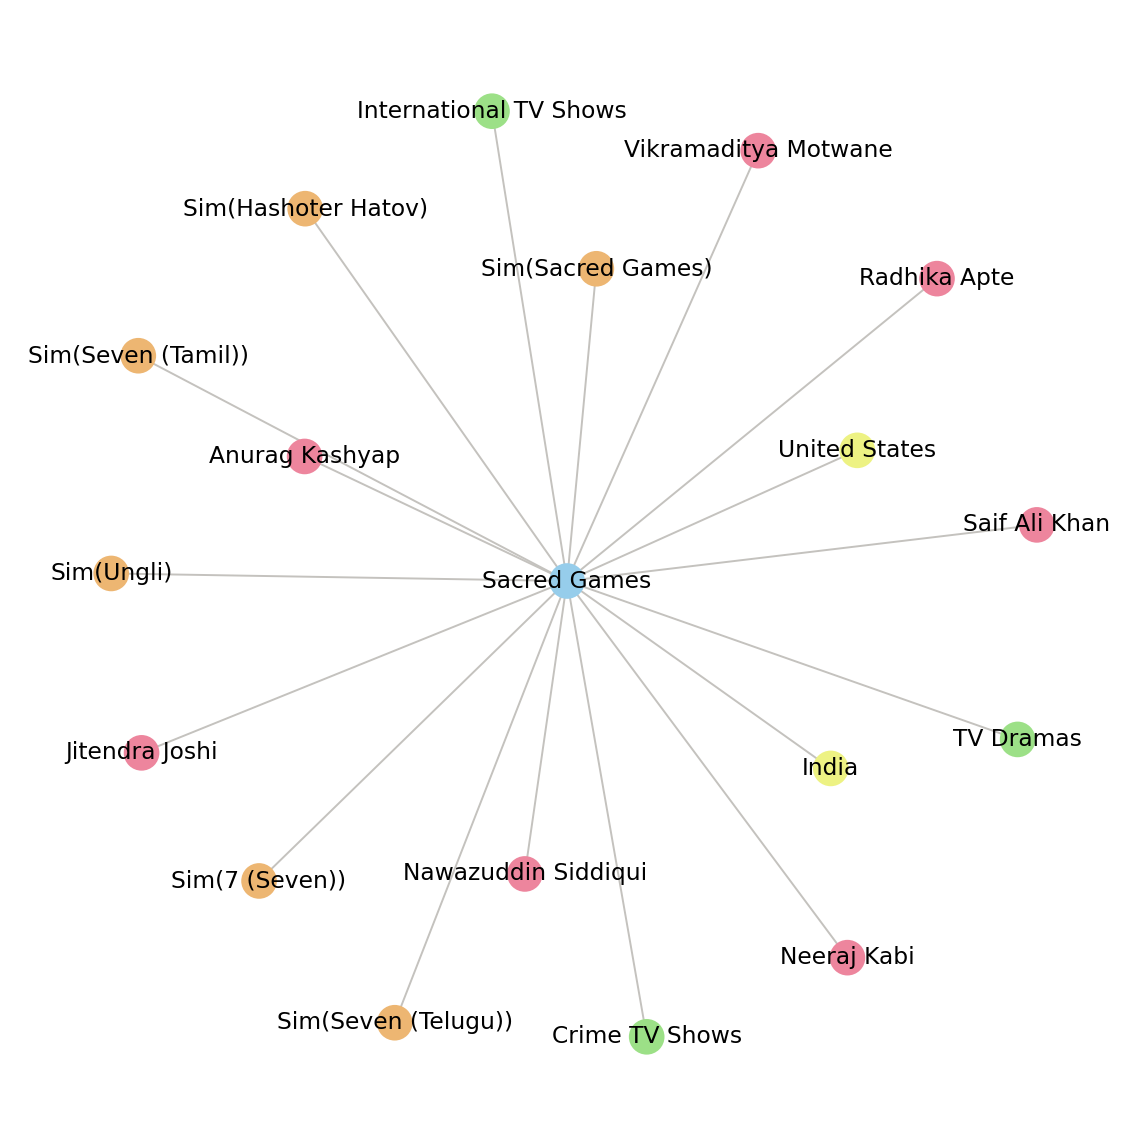

Seven (Tamil)                 2.376271
7 (Seven)                     2.376271
Seven (Telugu)                2.232443
Memories of the Alhambra      1.975584
The Women and the Murderer    1.674332
dtype: float64


****************************************************************************************************

 Extended Recommendation with Attributes
****************************************************************************************************


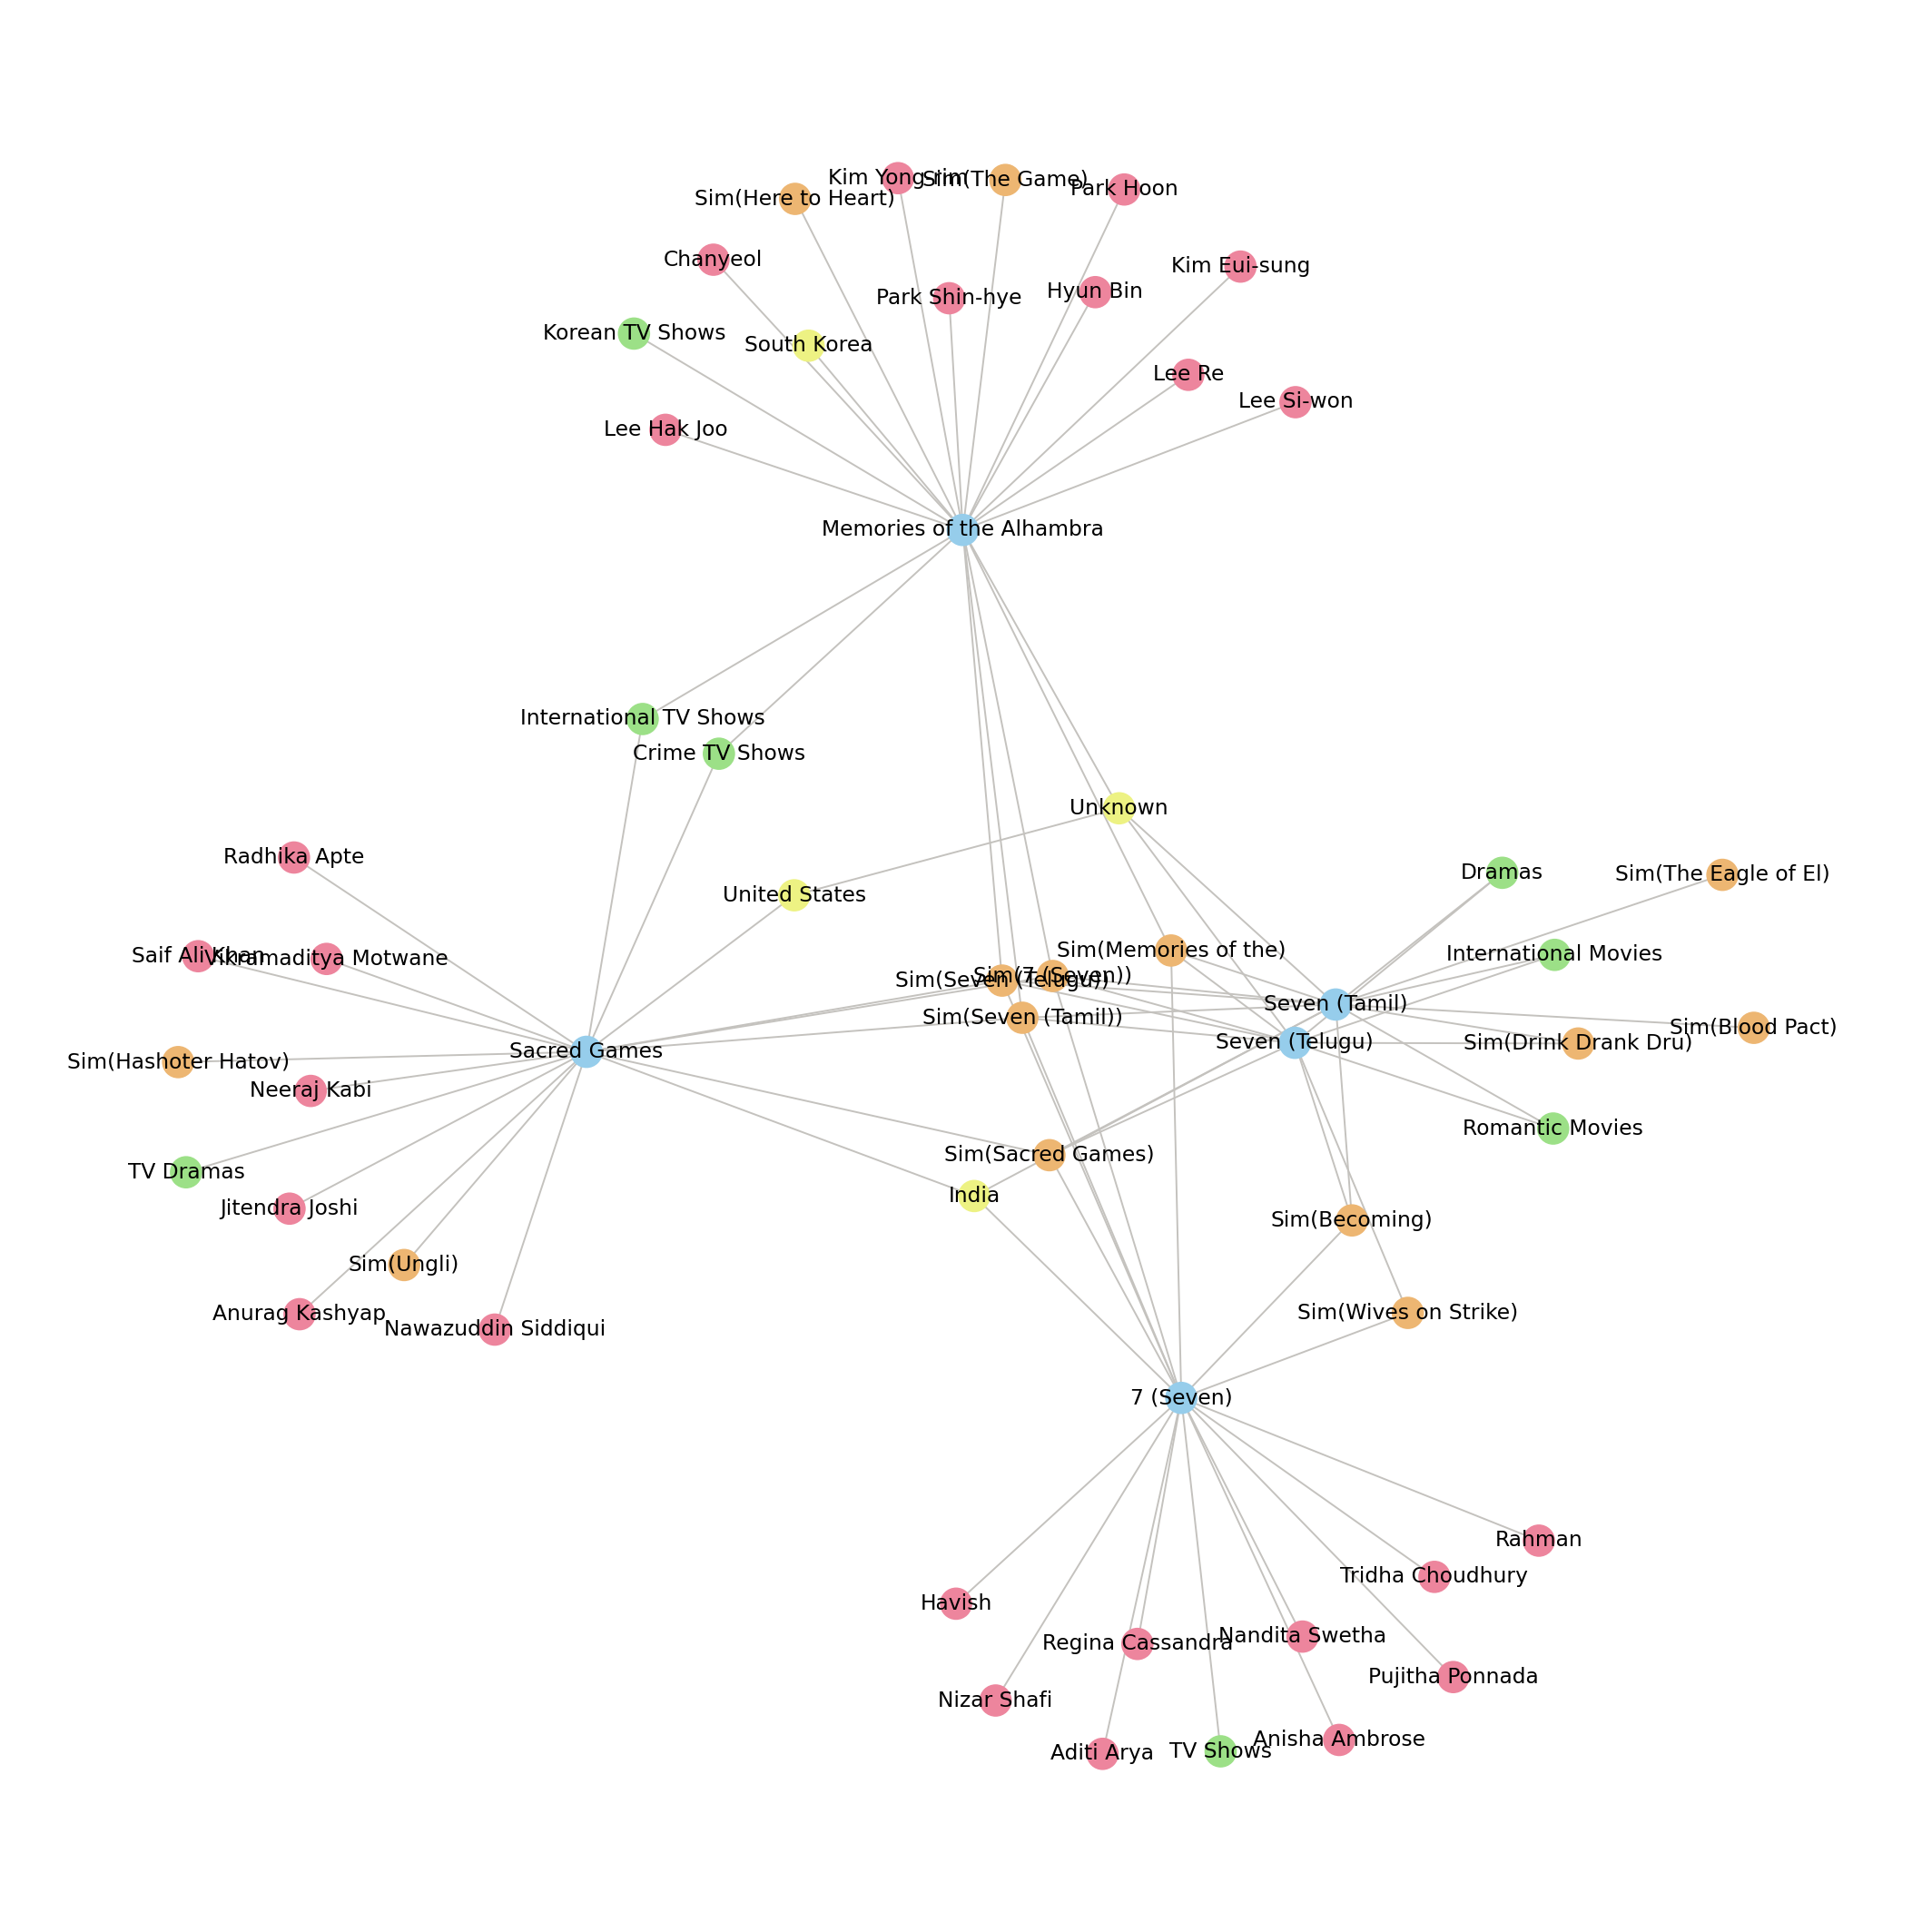

In [35]:
recommend("Sacred Games")